 # Mercedes-Benz Greener Manufacturing
 ## by Sonali Bapte

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore' )

### import train data

In [178]:
df_train=pd.read_csv('train.csv')
df_train.shape

(4209, 378)

In [161]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


### Import test data

In [162]:
df_test=pd.read_csv('test.csv')
df_test.shape

(4209, 377)

In [5]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


## EDA

In [230]:
y = df_train['y'].values

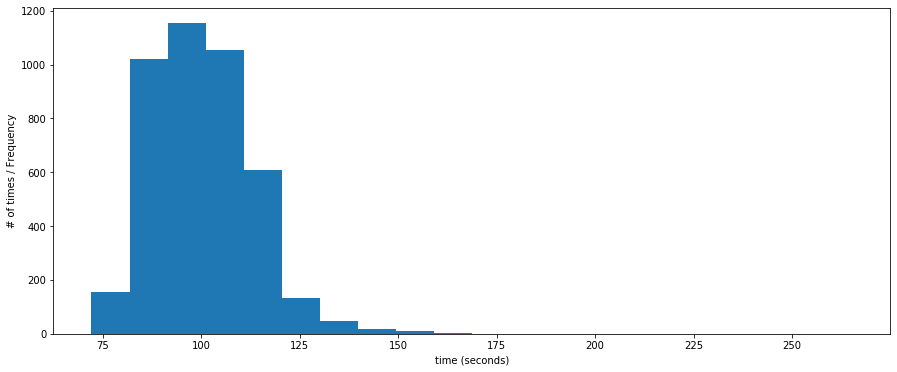

In [231]:
plt.figure(figsize=(15,6))
plt.hist(y,bins=20)
plt.ylabel('# of times / Frequency')
plt.xlabel('time (seconds)');

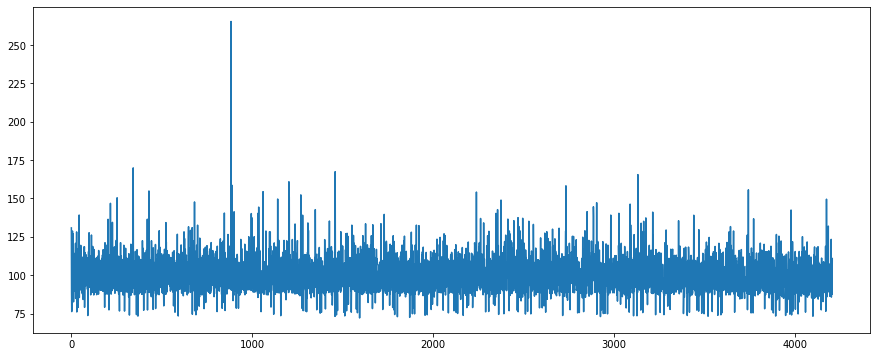

In [232]:
plt.figure(figsize=(15,6))
plt.plot(y);

 ## 1. Zero  Variance identication and varaible removal

### for train_data

In [163]:
object_df = df_train.select_dtypes(include=['object'])
object_df.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


In [164]:
# selecting object dataype variables with more than one unique values 
ids1 = object_df.nunique().values>1
object_df=object_df.loc[:,ids1]
object_df.head()


,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


In [165]:
num_df = df_train.select_dtypes(exclude=['object'])
num_df.head()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
ids2 = num_df.var()!=0
num_df=num_df.loc[:,ids2]
num_df.head()

,ID,y,X10,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
final_train=pd.concat([object_df,num_df],axis=1)
final_train.head()

,X0,X1,X2,X3,X4,X5,X6,X8,ID,y,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,130.81,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,6,88.53,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,7,76.26,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,9,80.62,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,13,78.02,...,0,0,0,0,0,0,0,0,0,0


### for test data

In [12]:
object_df1 = df_test.select_dtypes(include=['object'])
object_df1.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,az,v,n,f,d,t,a,w
1,t,b,ai,a,d,b,g,y
2,az,v,as,f,d,a,j,j
3,az,l,n,f,d,z,l,n
4,w,s,as,c,d,y,i,m


In [13]:
ids3 = object_df.nunique().values>1
object_df1=object_df1.loc[:,ids1]
object_df1.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,az,v,n,f,d,t,a,w
1,t,b,ai,a,d,b,g,y
2,az,v,as,f,d,a,j,j
3,az,l,n,f,d,z,l,n
4,w,s,as,c,d,y,i,m


In [14]:
num_df1 = df_test.select_dtypes(exclude=['object'])
num_df1.head()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [15]:
ids2 = num_df1.var()!=0
num_df1=num_df1.loc[:,ids2]
num_df1.head()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [16]:
final_test=pd.concat([object_df1,num_df1],axis=1)
final_test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,ID,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,1,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,2,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,3,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,4,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,5,0,...,1,0,0,0,0,0,0,0,0,0


## Check for null and unique values for test and train sets.

In [20]:
final_train.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
final_test.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
final_train.describe()

,ID,y,X10,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
column_values = final_train. values. ravel()
unique_values = pd.unique(column_values)
unique_values

array(['k', 'v', 'at', ..., 8415, 87.48, 8417], dtype=object)

In [32]:
column_values = final_test. values. ravel()
unique_values = pd.unique(column_values)
unique_values

array(['az', 'v', 'n', ..., 8413, 8414, 8416], dtype=object)

### Apply label encoder.

In [33]:
from sklearn.preprocessing import LabelEncoder

In [136]:
target_data=num_df["y"].values
##encoder = LabelEncoder()
#target_data = encoder.fit_transform(target_data)

In [138]:
target_data

array([130.81,  88.53,  76.26, ..., 109.22,  87.48, 110.85])

## Perform dimensionality reduction.

In [38]:
from sklearn.preprocessing import StandardScaler

In [135]:
final_train=num_df.drop(['y','ID'],axis=1)
final_train.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
scaler = StandardScaler()
scaler.fit(final_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [140]:
scaled_data = scaler.transform(final_train)

In [142]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
pcatrain=pca.fit_transform(final_train)

In [144]:
pca.explained_variance_ratio_

array([0.13075463, 0.08895904, 0.08608808, 0.06848157, 0.05775222])

In [145]:
pcatrain.shape

(4209, 5)

## XGBoost model

In [181]:
dft = pd.read_csv('test.csv')

features = list(set(df_train.columns)-set(['ID','y']))

X_train = df_train[features]
y_train = df_train['y'].values

X_test1 = dft[features]
id_test1 = df_train['ID'].values

for col in features:
    cardinality = len(np.unique(X_train[col]))
    
    # Dropping the contant columns
    if cardinality==1:
        X_train.drop(col,axis=1)
        X_test.drop(col,axis=1)
    
    # Label Encoding using ord
    if cardinality>2:
        mapper = lambda x: sum(ord(digit) for digit in x)
        X_train[col] = X_train[col].apply(mapper)
        X_test1[col] = X_test1[col].apply(mapper)
        

In [182]:
X_train.head()

,X202,X291,X358,X165,X159,X295,X2,X307,X214,X33,...,X239,X107,X201,X277,X345,X251,X273,X315,X328,X94
0,0,0,0,0,0,0,213,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,215,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,110,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,1,1,0,0,0,110,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,0,0,0,110,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [183]:
y_train

array([130.81,  88.53,  76.26, ..., 109.22,  87.48, 110.85])

In [184]:
X_test1.head()

,X202,X291,X358,X165,X159,X295,X2,X307,X214,X33,...,X239,X107,X201,X277,X345,X251,X273,X315,X328,X94
0,0,0,1,0,0,0,110,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,202,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,212,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,0,0,110,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,0,0,0,212,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train , test_size =0.3)

In [186]:
import xgboost as xgb
from sklearn.metrics import r2_score

In [188]:
#change the data to a Dmatrix 
D_train  = xgb.DMatrix(X_train, label = y_train)
D_test = xgb. DMatrix(X_test,label = y_test)
D_test1=xgb. DMatrix(X_test1)

In [189]:
param = {
       'eta' : 0.02,
    'max_depth' : 4,
    'objective': 'reg:linear',
}

In [201]:
model = xgb.train(param,D_train,1000,maximize=True)

[15:42:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:43:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [191]:
y_test

array([ 87.87, 106.78,  88.39, ..., 117.4 , 103.32,  89.8 ])

In [204]:
y_pred = model.predict(D_test1)
y_pred

pred = pd.DataFrame()

pred['ID'] = id_test1
pred['y'] = y_pred

In [206]:
pred.head(10)

,ID,y
0,0,101.384682
1,6,118.664429
2,7,99.304184
3,9,78.562378
4,13,110.530853
5,18,91.795837
6,24,111.207542
7,25,94.116333
8,27,115.795845
9,30,92.765724


## ## Accuracy of the model

In [125]:
from sklearn.metrics import r2_score

In [229]:
print("Accuracy:", r2_score(y_test,y_pred))

Accuracy: 0.5409062140969483


## Thank  you... !!!